Importing Library

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

Loading Data

In [88]:
data=pd.read_csv('data_for_lr.csv')

In [89]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


Data Preprocessing
Handling NULL Value

In [91]:
data=data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Splitting Data

In [93]:
#Training input and output
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

#Testing input and output data
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


<font color="green" size="20"> <B>Linear Regression </B></font>

<B>FORWARD PROPOGATION</B><br>
f(x)=mx+c

In [94]:
def forward_propogation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    predictions=np.multiply(m,train_input)+c
    return predictions

<B>COST FUNCTION</B><br>
<b> Mean Squared Error,Cost=[(y - f(x)) ^ 2] * 0.5)</b><br>
where y are the actual or true values and f(x) are the predicted values

In [95]:
def cost_function(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost

<b>Gradient Descent for Backpropagation</b>
Using Chain Rule:
<ul type="bullet">
<li>cost</li>
<li>f = f(x)</li>
</ul>
Partial Derivative of cost function w.r.t m **dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c **dcost/dc = dcost/df * df/dc **

Partial Derivatives:
<ul type="bullet">
<li>
dc/df = (y - f) * -1
<li>
df/dw = x
<li>
df/db = 1
</ul>

In [96]:
def backward_propogation(train_input,train_output,predections):
    derivatives=dict()
    df = predections-train_output
    dm = np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    
    return derivatives
    

<b>UPDATE PARAMETERS</b><br>
m=m-(learning_rate * dm)<br>
c=c-(learning_rate * dc)

In [97]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"]=parameters["m"]-learning_rate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate*derivatives["dc"]
    
    return parameters

<b>Train the Data</b><br>
Sequence of Steps:
<ul type="bullet">
<li>
Forward Propagtaion
<li>
Cost Function
<li>
Backward Propagation
<li>
Update Parameters

In [98]:
def train(train_input,train_output,learning_rate,iters):
    # random parameters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)*-1
    parameters["c"]=np.random.uniform(0,1)*-1
    
    plt.figure()
    
    #loss
    loss=list()
    
    #iteration
    for i in range(iters):
        #forward propogation
        predictions=forward_propogation(train_input,parameters)
        #cost
        cost=cost_function(predictions,train_output)
        
        loss.append(cost)
        print(f"iterations={i+1}, Loss={cost}")
        
        #plot
        fig,ax=plt.subplots()
        
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,predictions,"*",label="Training")
        
        legend=ax.legend()
        
        plt.plot(train_input,train_output,"+")
        plt.plot(train_input,predictions,"*")
        plt.show()
        
        #back propogation
        derivatives=backward_propogation(train_input,train_output,predictions)
        # update the parameters
        parameters=update_parameters(parameters,derivatives,learning_rate)
        
    return parameters,loss
    

### TRAINING

iterations=1, Loss=5448.61048693939


<Figure size 640x480 with 0 Axes>

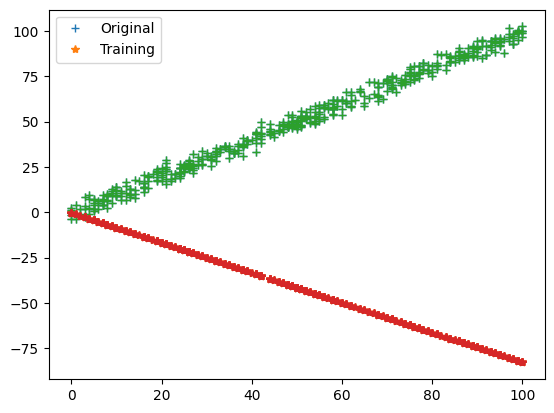

iterations=2, Loss=2474.177379055827


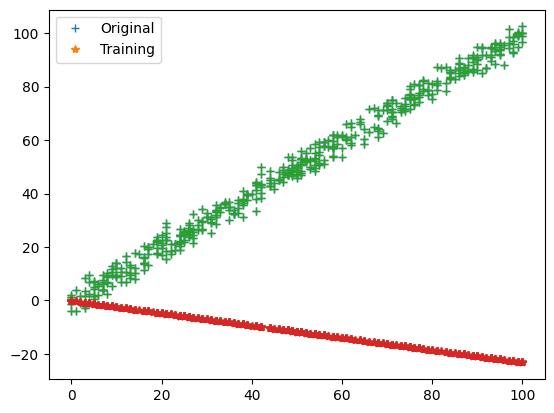

iterations=3, Loss=1124.6737833771272


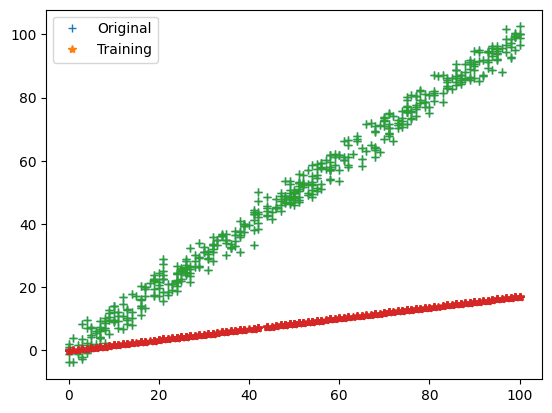

iterations=4, Loss=512.4025072246737


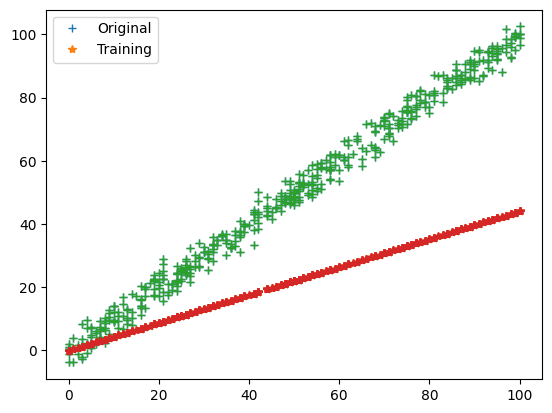

iterations=5, Loss=234.61435103018064


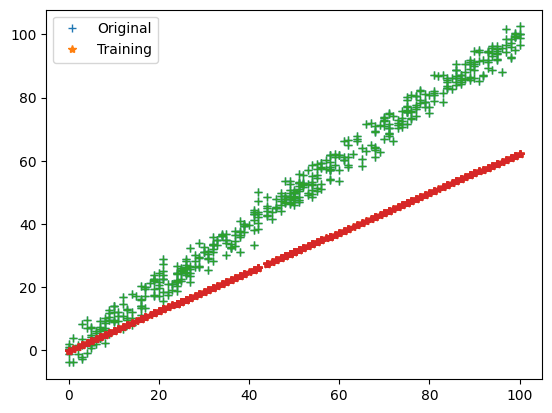

iterations=6, Loss=108.58155684790472


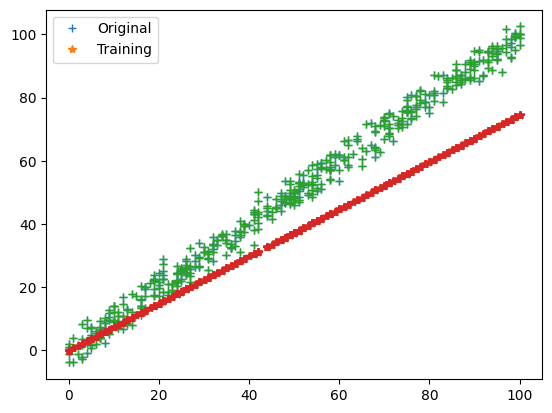

iterations=7, Loss=51.400338501066614


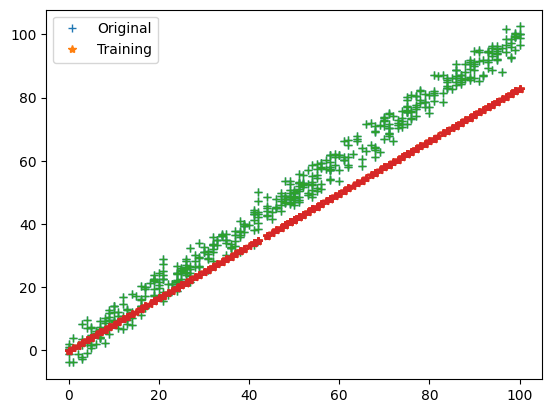

iterations=8, Loss=25.45715637361105


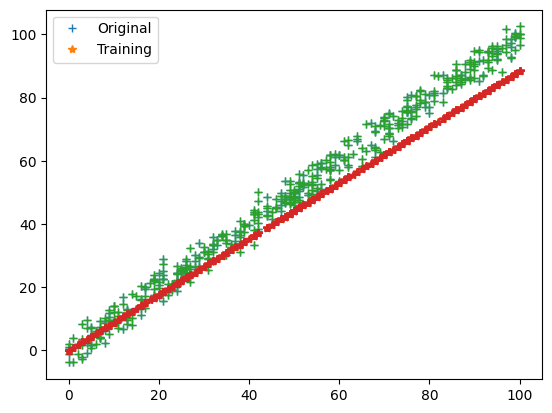

iterations=9, Loss=13.686705879427052


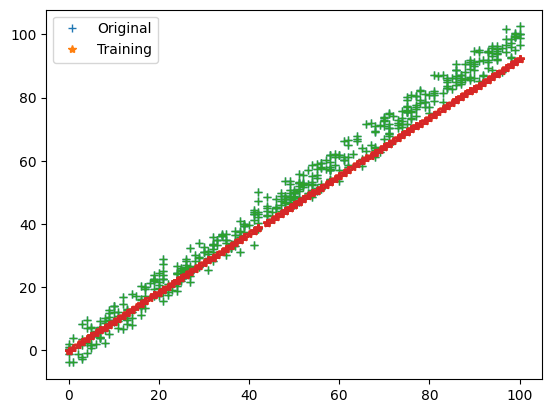

iterations=10, Loss=8.346439425561362


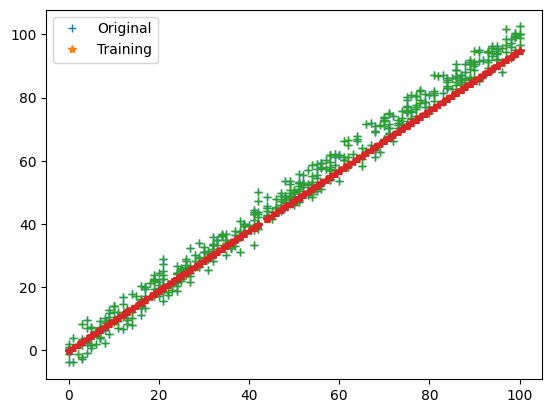

iterations=11, Loss=5.923554593126382


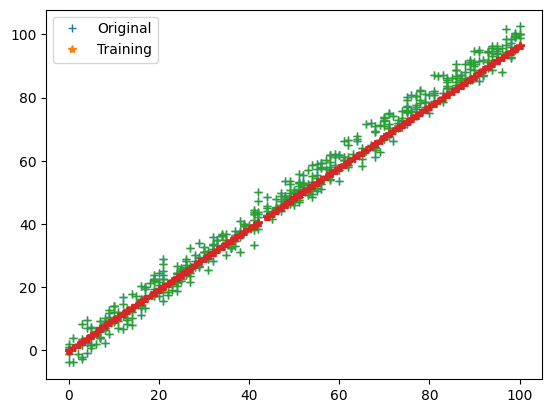

iterations=12, Loss=4.824289033747997


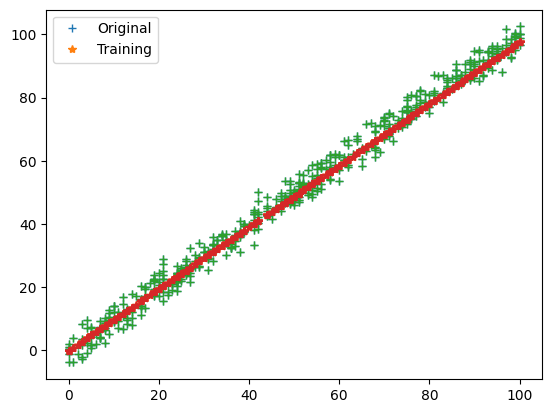

iterations=13, Loss=4.325551004652005


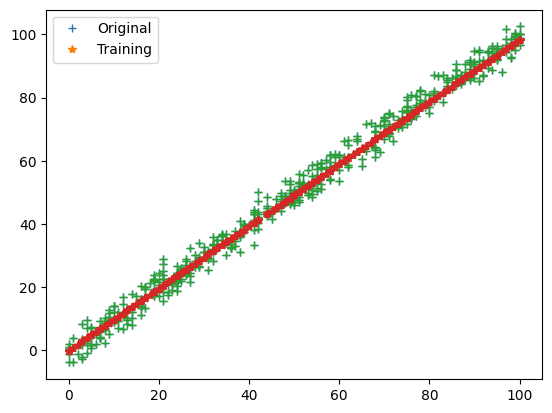

iterations=14, Loss=4.099272981215554


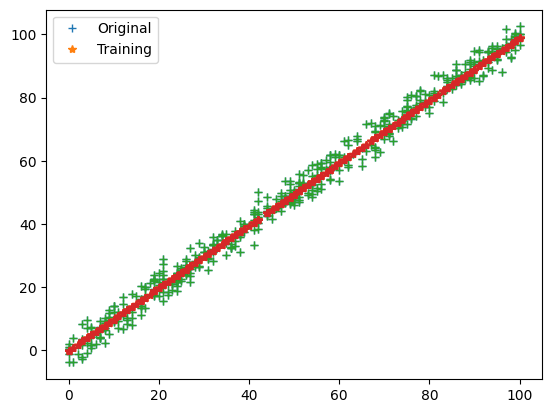

iterations=15, Loss=3.9966103641361377


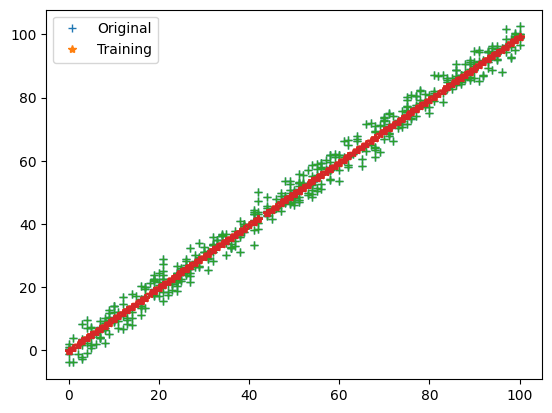

iterations=16, Loss=3.950032193843799


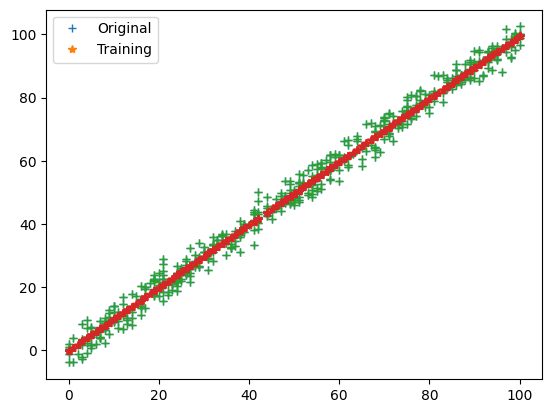

iterations=17, Loss=3.9288995991815736


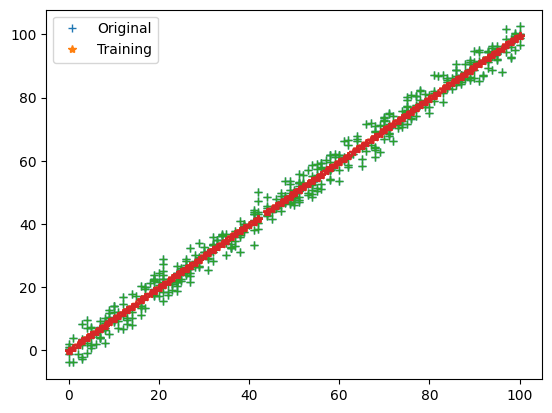

iterations=18, Loss=3.9193116903686676


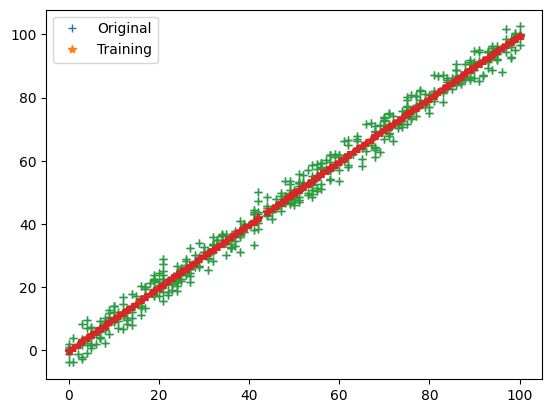

iterations=19, Loss=3.914961618314339


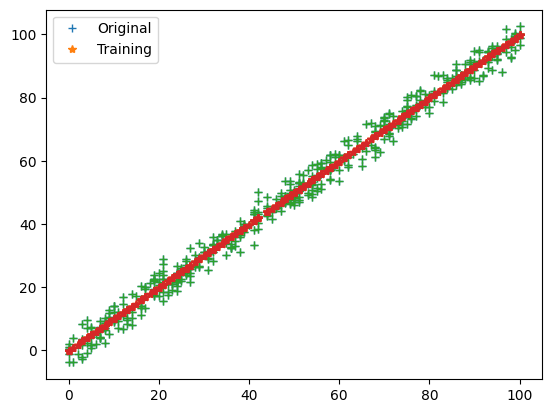

iterations=20, Loss=3.912987958600392


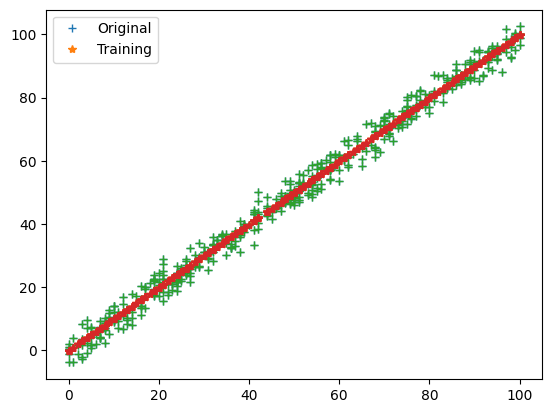

In [99]:
parameters, loss = train(train_input,train_output,0.0001,20)


<b>PREDICTION</b>

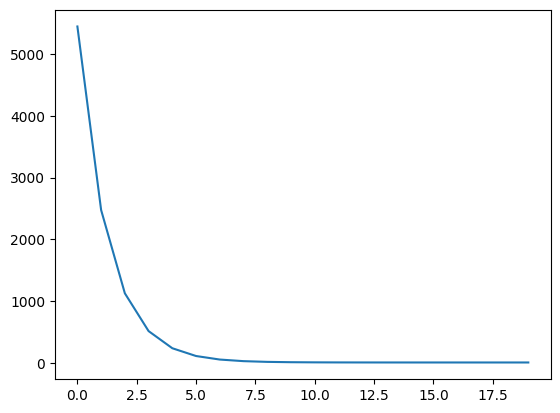

In [100]:
plt.plot(loss)

In [101]:
test_predictions=test_input*parameters["m"]+parameters["c"]

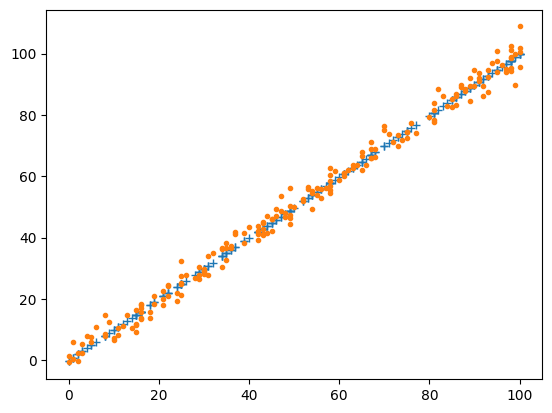

In [102]:
plt.plot(test_input,test_predictions,"+")
plt.plot(test_input,test_output,".")
plt.show()

<b>Cost Of prediction</b>

In [103]:
cost_function(test_output,test_predictions)

4.019680286472009